In [1]:
# Install library dependencies (versions fixed to those used at time of publication)
#
%pip install DeepXDE==1.7.1

# Uncomment and run these lines if tensorflow, numpy, and matplotlib are not already installed.
# In most execution environments (Colab, tensorflow Docker image, etc.), these are already
# pre-installed on the OS.
#
#%pip install numpy==1.23.5 \
#             matplotlib==3.7.1 \
#             tensorflow==2.12.0

import deepxde as dde
import numpy as np

from pinn import swe_1d

# Set random seed to 0 to allow for reproducible randomness in results
#
dde.config.set_random_seed(0)

# Set default float to 32-bit since Tensorflow seems to like that better
# when training on a GPU
#
dde.config.set_default_float('float32')


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


Using backend: tensorflow.compat.v1



Note: you may need to restart the kernel to use updated packages.


2023-05-15 23:48:32.399977: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-15 23:48:32.435052: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term
Enable just-in-time compilation with XLA.



2023-05-15 23:48:33.747463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 23:48:33.751732: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 23:48:33.751897: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Set the default float type to float32


## Homogeneous System (without Observed Data)

We solve the 1D shallow-water wave equations

$$
\begin{cases}
  h_t + (hv)_x = 0, \\
  v_t + v v_x + g h_x \cos{\alpha} + \frac{1}{2} g h (\cos{\alpha})_x - g \sin{\alpha} + C_f \frac{v^2}{h}
\end{cases}
$$

with horizontal bathymetry on $\Omega = [0, 200], T = [0, 15]$, no friction, periodic boundary conditions, and initial conditions:

\begin{align*}
  h(x, 0) &= 2 + \sin{\left(\frac{\pi x}{100} \right)} \\
  v(x, 0) &= 0.
\end{align*}

Compiling model...
Building feed-forward neural network...
'build' took 0.065479 s



/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/tf/swe/pinn.py:60: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hv = tf.layers.dense(x_t, hv_layer_size, tf.nn.tanh)
/tf/swe/pinn.py:61: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hv = tf.layers.dense(hv, hv_layer_size, tf.nn.tanh)
/tf/swe/pinn.py:62: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hv = tf.layers.dense(hv, hv_layer_size, tf.nn.tanh)
/tf/swe/pinn.py:63: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead

'compile' took 1.030233 s

Training iterations 0-2500
Initializing variables...
Training model...



2023-05-15 23:48:36.075960: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-05-15 23:48:36.187222: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f477800d670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-15 23:48:36.187263: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2023-05-15 23:48:36.198528: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-15 23:48:36.568066: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-15 23:48:37.486151: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                                                                          Test loss                                                                           Test metric
0         [2.36e-04, 1.40e-02, 6.25e+00, 3.29e-03, 1.10e-01, 7.39e-01, 6.94e-03, 5.90e-03]    [2.36e-04, 1.40e-02, 6.25e+00, 3.29e-03, 1.10e-01, 7.39e-01, 6.94e-03, 5.90e-03]    []  
1000      [6.44e-03, 5.94e-03, 1.70e-02, 1.62e-04, 1.06e-03, 1.91e-04, 3.66e-05, 4.59e-05]    [6.44e-03, 5.94e-03, 1.70e-02, 1.62e-04, 1.06e-03, 1.91e-04, 3.66e-05, 4.59e-05]    []  
2000      [5.27e-03, 1.13e-02, 8.54e-02, 4.43e-03, 8.59e-03, 1.20e-03, 2.48e-04, 1.10e-04]    [5.27e-03, 1.13e-02, 8.54e-02, 4.43e-03, 8.59e-03, 1.20e-03, 2.48e-04, 1.10e-04]    []  
2500      [7.94e-03, 9.66e-03, 2.06e-02, 1.82e-04, 4.20e-04, 1.45e-04, 2.71e-05, 8.87e-05]    [7.94e-03, 9.66e-03, 2.06e-02, 1.82e-04, 4.20e-04, 1.45e-04, 2.71e-05, 8.87e-05]    []  

Best model at step 1000:
  train loss: 3.08e-02
  test loss: 3.08e-02
  test 

2023-05-15 23:48:46.866866: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


3000      [7.97e-03, 7.42e-03, 1.25e-02, 8.33e-04, 6.31e-04, 1.50e-04, 3.74e-05, 1.36e-04]    [7.97e-03, 7.42e-03, 1.25e-02, 8.33e-04, 6.31e-04, 1.50e-04, 3.74e-05, 1.36e-04]    []  
4000      [8.25e-03, 8.36e-03, 3.26e-02, 1.64e-04, 1.06e-03, 2.29e-05, 2.16e-05, 1.77e-05]    [8.25e-03, 8.36e-03, 3.26e-02, 1.64e-04, 1.06e-03, 2.29e-05, 2.16e-05, 1.77e-05]    []  
5000      [4.99e-03, 4.42e-03, 3.68e-03, 2.57e-04, 2.39e-04, 7.14e-06, 1.75e-05, 2.37e-05]    [4.99e-03, 4.42e-03, 3.68e-03, 2.57e-04, 2.39e-04, 7.14e-06, 1.75e-05, 2.37e-05]    []  

Best model at step 5000:
  train loss: 1.36e-02
  test loss: 1.36e-02
  test metric: []

'train' took 9.059732 s

Training iterations 5000-7500
Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
5000      [4.99e-03, 4.42e-03, 3.68e-03, 2.57e-04, 2.39e-04, 7.14e-06, 1.75e-05, 2.37e-05]    [4.

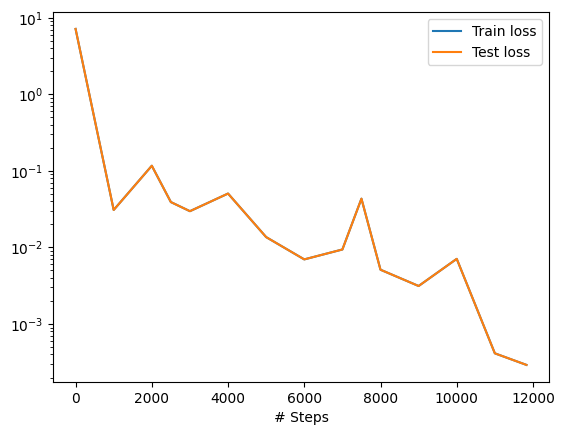

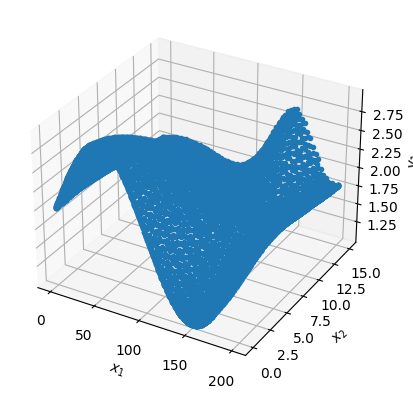

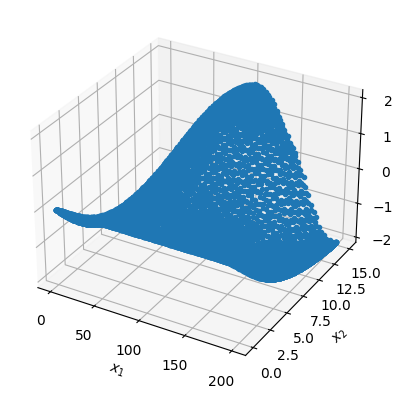

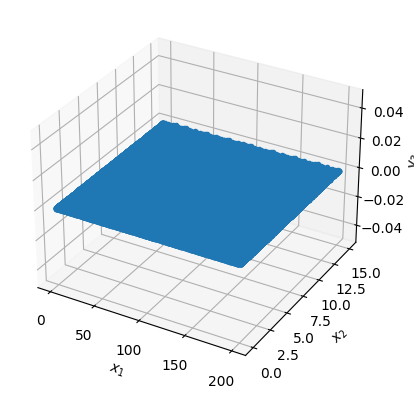

In [2]:
# Generate domain
#
x_min, x_max = (0, 200)
t_min, t_max = (0, 15)

geom = dde.geometry.Interval(x_min, x_max)
timedomain = dde.geometry.TimeDomain(t_min, t_max)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Periodic boundary conditions for height and velocity, respectively
#
bc_h = dde.icbc.PeriodicBC(
    geomtime, 
    0, 
    lambda _, on_boundary: on_boundary, 
    component=0, 
    derivative_order=0
)
bc_v = dde.icbc.PeriodicBC(
    geomtime, 
    0, 
    lambda _, 
    on_boundary: on_boundary, 
    component=1, 
    derivative_order=0
)

# Periodic boundary conditions for height and velocity derivatives, respectively
#
bc_h_x = dde.icbc.PeriodicBC(
    geomtime, 
    0, 
    lambda _, on_boundary: on_boundary, 
    component=0, 
    derivative_order=1
)
bc_v_x = dde.icbc.PeriodicBC(
    geomtime, 
    0, 
    lambda _, on_boundary: on_boundary,
    component=1, 
    derivative_order=1
)

# Initial condition for wave height
#
ic_h = dde.icbc.IC(
    geomtime,
    lambda x: 2 + np.sin(x[:, 0:1] * np.pi / 100),
    lambda _, on_initial: on_initial,
    component=0,
)

# Initial condition for wave velocity
#
ic_v = dde.icbc.IC(
    geomtime,
    lambda x: 0,
    lambda _, on_initial: on_initial,
    component=1,
)

# Solve system
#
homogeneous_model = swe_1d(
    geomtime,
    [
        ic_h,
        ic_v
    ],
    [
        bc_h,
        bc_v,

        bc_h_x,
        bc_v_x,
    ],
    iterations=10000,
    prescribed_bathymetry=lambda x: x[:, 0:1]*0,  # horizontal prescribed bathymetry
)

# Save data points for next section (if desired)
#
# X = geomtime.uniform_points(50000)
# Y = homogeneous_model.predict(X)
# print('Saving data file...')
# np.savetxt('data/homogeneous_swe_pinn_observation.csv', np.column_stack((
#     X[:, 0:1],
#     X[:, 1:2],
#     Y[:, 0:1],
#     Y[:, 1:2],
#     Y[:, 2:3],
# )), delimiter=',', header='x,t,h,v,alpha')
# print('Data file saved.')

## Inhomogeneous System (with Homogeneous Observed Data)


We now replicate the above results with a twist: we do not prescribe the underlying bathymetry, but instead allow the neural network to figure out what it _must_ be. This naturally requires some extra context; after all, if we allow the bathymetry to vary any which way, the neural network will simply find some bathymetry, wave velocity, and bathymetry combination which minimizes the PDE residual.

To ameliorate this, we add 100 "measurements" of the surface to our objective function and enforce consistency with these measurements. In doing so, we inform the neural network that it must find a solution which correctly predicts the wave height at these 100 temporospatial points. We further impose periodic boundary conditions on the bathymetry (since for a cylindrical wave tank, we certainly would not expect a discontinuity in the bathymetry).

Prior to running this cell, run the MATLAB/Octave script `homogeneous_swe.m` from the `pseudospectral` directory adjacent to this notebook in order to generate the required data files.

Compiling model...
Building feed-forward neural network...
'build' took 0.062692 s



2023-05-15 23:49:29.734629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 23:49:29.734910: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 23:49:29.735031: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

'compile' took 0.675818 s

Training iterations 0-12500
Initializing variables...
Training model...



2023-05-15 23:49:33.265777: I tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:328] ptxas warning : Registers are spilled to local memory in function 'fusion_12', 496 bytes spill stores, 636 bytes spill loads



Step      Train loss                                                                                                        Test loss                                                                                                         Test metric
0         [8.87e-03, 2.55e+00, 8.87e-01, 7.47e-01, 7.57e+00, 2.85e+00, 2.22e-02, 3.55e-02, 1.64e-02, 2.50e-04, 1.41e+00]    [8.87e-03, 2.55e+00, 8.87e-01, 7.47e-01, 7.57e+00, 2.85e+00, 2.22e-02, 3.55e-02, 1.64e-02, 2.50e-04, 1.41e+00]    []  
1000      [3.04e-03, 8.56e-03, 1.80e-02, 3.97e-05, 8.14e-04, 3.49e-05, 5.18e-05, 3.56e-06, 3.75e-05, 5.20e-06, 1.96e-02]    [3.04e-03, 8.56e-03, 1.80e-02, 3.97e-05, 8.14e-04, 3.49e-05, 5.18e-05, 3.56e-06, 3.75e-05, 5.20e-06, 1.96e-02]    []  
2000      [1.82e-03, 6.60e-03, 4.29e-02, 2.64e-04, 3.98e-03, 5.75e-04, 1.61e-06, 2.98e-05, 8.84e-06, 1.11e-05, 4.03e-02]    [1.82e-03, 6.60e-03, 4.29e-02, 2.64e-04, 3.98e-03, 5.75e-04, 1.61e-06, 2.98e-05, 8.84e-06, 1.11e-05, 4.03e-02]    []  
3000      [2.23e-03, 

27000     [5.21e-04, 6.58e-03, 5.00e-03, 6.86e-03, 1.11e-03, 1.11e-03, 9.25e-05, 1.24e-05, 9.31e-06, 5.38e-07, 4.57e-03]    [5.21e-04, 6.58e-03, 5.00e-03, 6.86e-03, 1.11e-03, 1.11e-03, 9.25e-05, 1.24e-05, 9.31e-06, 5.38e-07, 4.57e-03]    []  
28000     [7.58e-04, 1.47e-03, 6.50e-04, 1.43e-03, 1.43e-04, 1.87e-04, 4.52e-09, 1.37e-05, 7.38e-06, 3.87e-09, 1.20e-03]    [7.58e-04, 1.47e-03, 6.50e-04, 1.43e-03, 1.43e-04, 1.87e-04, 4.52e-09, 1.37e-05, 7.38e-06, 3.87e-09, 1.20e-03]    []  
29000     [6.25e-04, 1.47e-03, 5.08e-04, 3.64e-05, 1.60e-04, 1.93e-04, 2.56e-06, 6.01e-06, 5.10e-06, 1.08e-07, 8.59e-04]    [6.25e-04, 1.47e-03, 5.08e-04, 3.64e-05, 1.60e-04, 1.93e-04, 2.56e-06, 6.01e-06, 5.10e-06, 1.08e-07, 8.59e-04]    []  
30000     [6.12e-04, 1.51e-02, 5.39e-04, 1.04e-03, 6.64e-05, 8.09e-04, 1.01e-03, 4.85e-06, 2.28e-06, 2.16e-05, 1.02e-03]    [6.12e-04, 1.51e-02, 5.39e-04, 1.04e-03, 6.64e-05, 8.09e-04, 1.01e-03, 4.85e-06, 2.28e-06, 2.16e-05, 1.02e-03]    []  
31000     [6.12e-04, 1.66e-0

2023-05-15 23:53:38.952330: I tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:328] ptxas warning : Registers are spilled to local memory in function 'fusion_12', 496 bytes spill stores, 636 bytes spill loads



Step      Train loss                                                                                                        Test loss                                                                                                         Test metric
50000     [4.30e-04, 6.53e-04, 1.37e-04, 3.87e-04, 1.08e-05, 9.14e-05, 2.85e-06, 2.12e-06, 1.04e-05, 5.52e-08, 4.25e-04]    [4.30e-04, 6.53e-04, 1.37e-04, 3.87e-04, 1.08e-05, 9.14e-05, 2.85e-06, 2.12e-06, 1.04e-05, 5.52e-08, 4.25e-04]    []  
51000     [2.51e-04, 2.26e-04, 2.25e-05, 2.64e-05, 7.35e-06, 4.37e-06, 1.42e-07, 3.82e-06, 6.81e-06, 5.08e-08, 1.42e-04]    [2.51e-04, 2.26e-04, 2.25e-05, 2.64e-05, 7.35e-06, 4.37e-06, 1.42e-07, 3.82e-06, 6.81e-06, 5.08e-08, 1.42e-04]        
52000     [1.73e-04, 1.93e-04, 9.81e-06, 1.02e-05, 2.82e-06, 5.96e-06, 2.03e-07, 3.31e-06, 3.70e-06, 2.27e-10, 9.82e-05]    [1.73e-04, 1.93e-04, 9.81e-06, 1.02e-05, 2.82e-06, 5.96e-06, 2.03e-07, 3.31e-06, 3.70e-06, 2.27e-10, 9.82e-05]        
53000     [1.23e-04, 

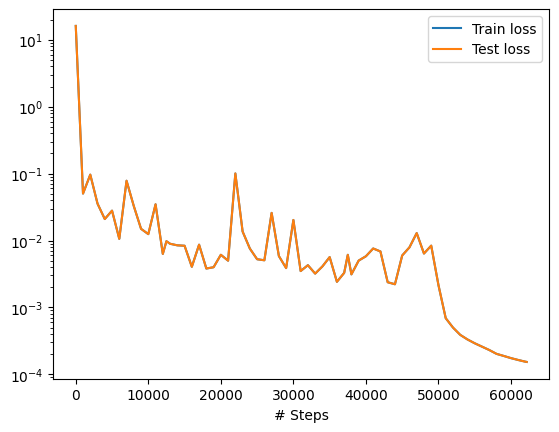

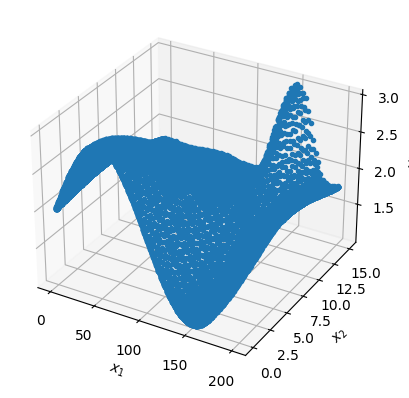

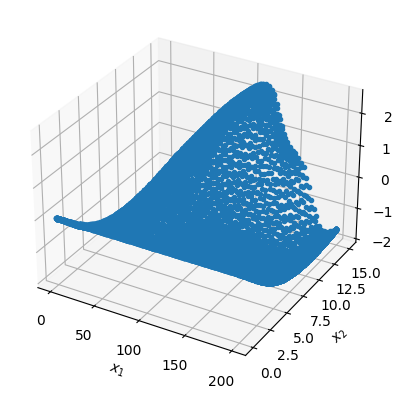

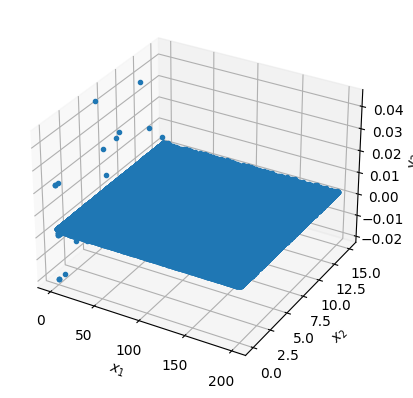

L2 relative error: 0.0921138204351435
Plots at sampled points:


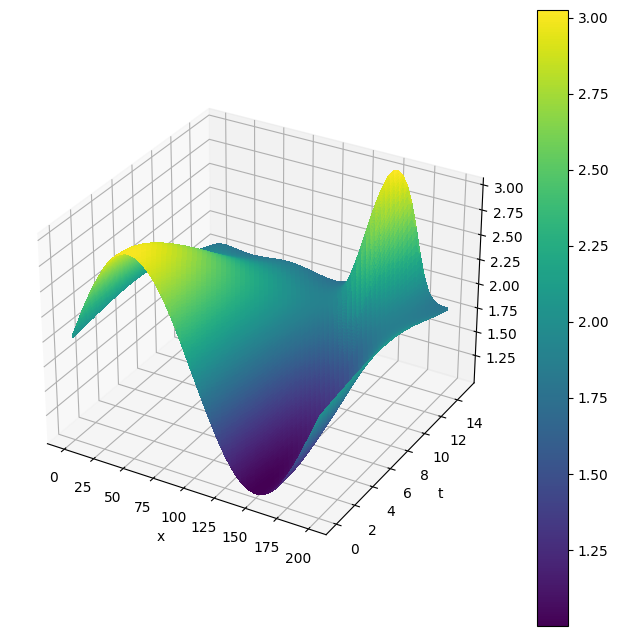

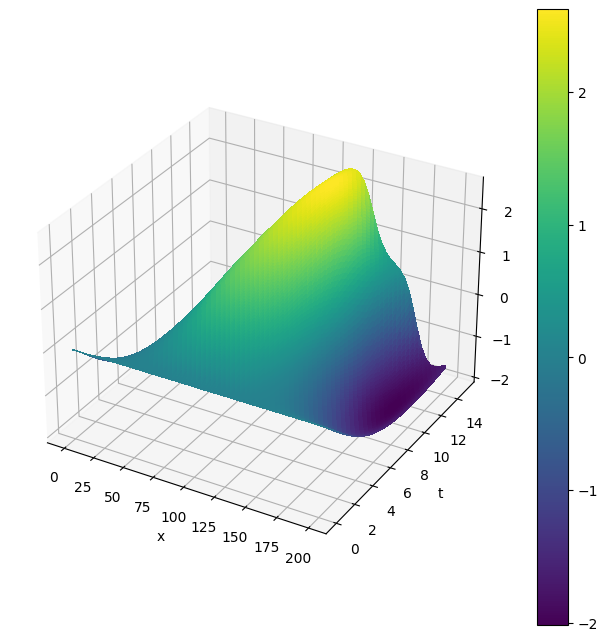

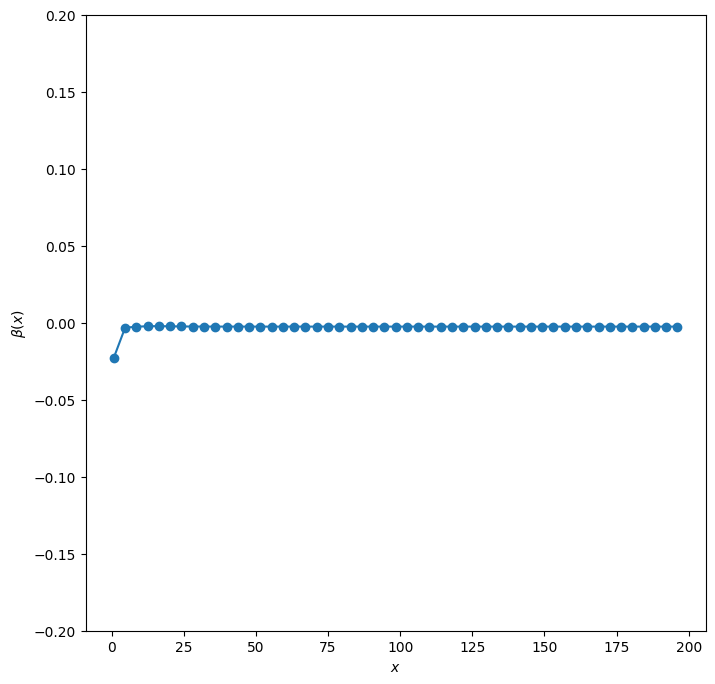

In [3]:
from csv_utils import load_data

# Generate domain
#
x_min, x_max = (0, 200)
t_min, t_max = (0, 15)

geom = dde.geometry.Interval(x_min, x_max)
timedomain = dde.geometry.TimeDomain(t_min, t_max)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Change to data/homogeneous_swe_observation.csv to use pseudospectral solution data, if available.
#
all_observed_data = load_data(file='data/homogeneous_swe_observation.csv')
observed_training_data = load_data(100, file='data/homogeneous_swe_observation.csv')

# Periodic boundary conditions for height, velocity, and bathymetry, respectively
#
bc_h = dde.icbc.PeriodicBC(geomtime, 0, lambda _, on_boundary: on_boundary, component=0, derivative_order=0)
bc_v = dde.icbc.PeriodicBC(geomtime, 0, lambda _, on_boundary: on_boundary, component=1, derivative_order=0)
bc_alpha = dde.icbc.PeriodicBC(geomtime, 0, lambda _, on_boundary: on_boundary, component=2, derivative_order=0)

# Periodic boundary conditions for height, velocity, and bathymetry derivatives, respectively
#
bc_h_x = dde.icbc.PeriodicBC(geomtime, 0, lambda _, on_boundary: on_boundary, component=0, derivative_order=1)
bc_v_x = dde.icbc.PeriodicBC(geomtime, 0, lambda _, on_boundary: on_boundary, component=1, derivative_order=1)
bc_alpha_x = dde.icbc.PeriodicBC(geomtime, 0, lambda _, on_boundary: on_boundary, component=2, derivative_order=1)

# Point set Dirichlet BCs
#
bc_h_obs = dde.icbc.PointSetBC(observed_training_data[:, 0:2], observed_training_data[:, 2:3], component=0)
bc_v_obs = dde.icbc.PointSetBC(observed_training_data[:, 0:2], observed_training_data[:, 3:4], component=1)
bc_alpha_obs = dde.icbc.PointSetBC(observed_training_data[:, 0:2], observed_training_data[:, 4:5], component=2)

# Initial condition for wave height
#
ic_h = dde.icbc.IC(
    geomtime,
    lambda x: 2 + np.sin(x[:, 0:1] * np.pi / 100),
    lambda _, on_initial: on_initial,
    component=0,
)

# Initial condition for wave velocity
#
ic_v = dde.icbc.IC(
    geomtime,
    lambda x: 0,
    lambda _, on_initial: on_initial,
    component=1,
)

# Solve system
#
inhomogeneous_model = swe_1d(
    geomtime,
    [
        ic_h,
        ic_v
    ],
    [
        bc_h,
        bc_v,
        bc_alpha,

        bc_h_x,
        bc_v_x,
        bc_alpha_x,

        bc_h_obs,
    ],
    iterations=50000,
    prescribed_bathymetry=None,  # Setting this to None indicates that we wish to infer the bathymetry.
    samples=all_observed_data[1::5]  # Compute error over uniformly sampled observation set
)
